In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np


11493376/11490434 [==============================] - 1s 0us/step


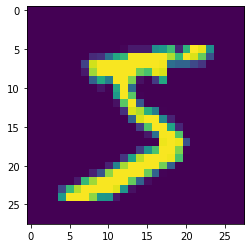

In [3]:
#cargar datos (MNIST)

db_mnist = keras.datasets.mnist

# "x" es la imagen en forma matricial, "y" es el valor escrito en numero int
(x_entrenamiento, y_entrenamiento), (x_prueba, y_prueba) = db_mnist.load_data()

#mostrar imagen 1
img = plt.imshow(x_entrenamiento[0])
plt.show()

In [10]:
#Normalizar
x_entrenamiento = x_entrenamiento/255. #de divide para que sea flotante
x_prueba =  x_prueba/255.

#Modelar Arquitectura
input_shape = (28, 28) 

model = keras.models.Sequential()

 # estira el vector de imagenes para que quede un vector
model.add(keras.layers.Flatten(input_shape=input_shape))

 # usa las la activacion relu las 128 neuronas iniciales
model.add(keras.layers.Dense(128, activation=tf.nn.relu))

 # utilizara 10 neuronas finales dense
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))

model.summary() # imprime el resumen de la arquitectura que construimos

Model: &quot;sequential_1&quot;
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
# entrenamiento (parametros)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # modificador de pesos
                # en esas 8 calcula el error utilizando esta funcion de coste   
              loss=tf.keras.losses.sparse_categorical_crossentropy, 
              metrics=['accuracy']) # precision para decir a tensorflow que queremos ver

# inicia entrenamiento
model.fit(x_entrenamiento, y_entrenamiento, validation_split=0.3, epochs=8) #valida el 30% para validacion y has 8 iteraciones para que no haya tanto overfiting (aqui se ajusta)

Epoch 1/8
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0784 - accuracy: 0.9846 - val_loss: 0.4070 - val_accuracy: 0.9598
Epoch 2/8
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0722 - accuracy: 0.9849 - val_loss: 0.4642 - val_accuracy: 0.9573
Epoch 3/8
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0829 - accuracy: 0.9832 - val_loss: 0.4228 - val_accuracy: 0.9593
Epoch 4/8
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0783 - accuracy: 0.9854 - val_loss: 0.4166 - val_accuracy: 0.9612
Epoch 5/8
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0719 - accuracy: 0.9859 - val_loss: 0.4249 - val_accuracy: 0.9629
Epoch 6/8
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0709 - accuracy: 0.9870 - val_loss: 0.5346 - val_accuracy: 0.9592
Epoch 7/8
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0794 - accuracy: 0.9867 - val_loss: 0.4072 - val_accuracy: 0.9646

&lt;tensorflow.python.keras.callbacks.History at 0x291240c8b50&gt;

valor predecido: 3
valor real: 3
la prediccion es acertada? : True


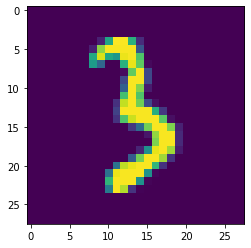

In [8]:
# despues de entrenar pasamos las imagenes de prueba

predicciones = model.predict(x_prueba[44][None,:,:]) # solo queremos predecir 1
prediccion = np.argmax(predicciones)

print(f"valor predecido: {prediccion}") # imprime el valor predecido

print(f"valor real: {y_prueba[44]}") # imprime el valor real

print(f"la prediccion es acertada? : {prediccion == y_prueba[44]}")

plt.imshow(x_prueba[44])
plt.show()